# Radiation pulse shape discrimination using Machine Learning 
## How to differentiate neutrons and gamma particles in Helium-4 gas scintillation detector

Neutron radiation sources are often accompanied by photon (ie.gamma) emission. For example, the radioactive element Californium-252 emits on average, 3.7 neutrons via spontaneous fission, as well as about 7 photons at each disintegration. The detection of neutrons and gammas is important for identifying radioactive materials. While many gamma detectors are well-developed already, effective neutron detectors continue to be researched. Neutron detectors' performance is affected by the ability to distinguish gammas from neutrons events. Since gammas are often present with neutron sources, postprocessing techniques are needed to separate gamma events from neutron events in the recorded detector output.


## Pulse shapes from neutron or gamma particles
Helium-4 gas scintillation detectors are being developed to replace the conventional Helium-3 neutron detectors, given the greater natural abundance of Helium-4 than Helium-3. It also has the desired property of gamma discrimination. Visually, it can be seen that the scintillation pulse signal from Hellium-4 detector is characterized by a fast and a slow component. Depending on the particle, neutron and gamma have different signature pulse shapes. 

Plot examples of gamma source (Cobalt-60) and neutron source (Californium-252) and their corresponding typical pulse shape recorded by Helium-4 detector. The signal after the peak is the so-called slow component, which has a much longer decay time scale over a few micro-seconds. A neutron event, due to much larger energy deposition, has a larger slow component than a gamma event.  

Total of  14725  events from detector Bs144
Total of  1629  events from detector Bs144


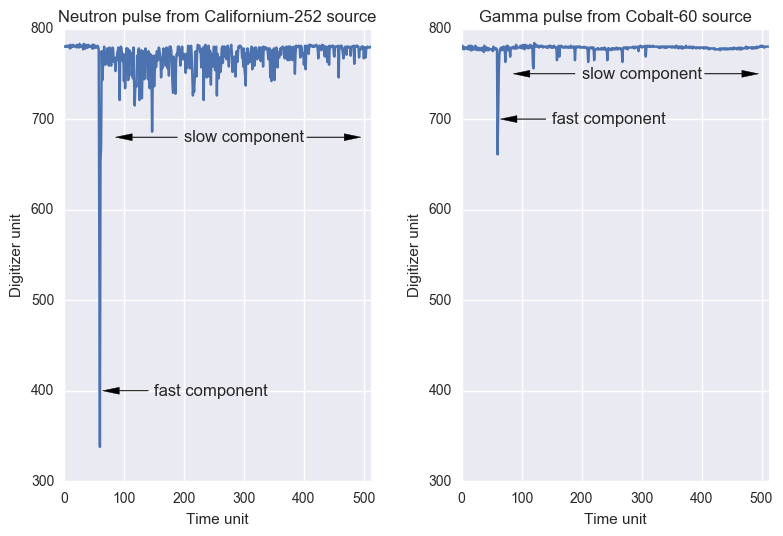

In [3]:
import h5py 
import numpy as np
import numpy.matlib as npm
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_palette(sns.color_palette("deep"))

# helium-4 detector uses H5 format to store the scintillaion information
fname='.\Cf_VG10_g2_t100_5min_1.h5'
f_in=h5py.File(fname,"r") 
det_ids = f_in['events']['metainfo']  # det_ids must be correlated to actual detector name 
det_sequence = f_in['events']['metainfo']['detector_id']   
det_key = f_in['detectorinfo']        # correlates detector id to detector name

all_detname=[]
for j in det_key:                      # creates list of detectors names in order of id
    all_detname.append(j[0])

# choose detector # 144 to plot
det_name='Bs144'
det_id=all_detname.index(det_name)
event_det_limit,=np.where(det_sequence[:]==det_id)
traces=[f_in['events']['traces'][idx] for idx in event_det_limit]
print 'Total of ',len(traces),' events from detector', det_name

tm0_Cf = np.vstack([d[0] for d in traces]).T
tm1_Cf = np.vstack([d[1] for d in traces]).T

# ------------------- 
# helium-4 detector uses H5 format to store the scintillaion information
fname='.\Co_VG10_g2_t100_5min_1.h5'
f_in=h5py.File(fname,"r") 
det_ids = f_in['events']['metainfo']  # det_ids must be correlated to actual detector name 
det_sequence = f_in['events']['metainfo']['detector_id']   
det_key = f_in['detectorinfo']        # correlates detector id to detector name

all_detname=[]
for j in det_key:                      # creates list of detectors names in order of id
    all_detname.append(j[0])

# choose detector # 144 to plot
det_name='Bs144'
det_id=all_detname.index(det_name)
event_det_limit,=np.where(det_sequence[:]==det_id)
traces=[f_in['events']['traces'][idx] for idx in event_det_limit]
print 'Total of ',len(traces),' events from detector', det_name

tm0_Co = np.vstack([d[0] for d in traces]).T
tm1_Co = np.vstack([d[1] for d in traces]).T

# choose to plot an example recorded event 
f, (ax1, ax2) = plt.subplots(1, 2)
f.set_figwidth(8)
event_num=1000
ax1.plot(tm0_Cf[:,event_num])
#ax1.plot(tm1_Cf[:,event_num+1],label='PMT2')
ax1.set_title('Neutron pulse from Californium-252 source')
#ax1.legend(loc=4)
ax1.set_xlabel('Time unit')
ax1.set_ylabel('Digitizer unit')
ax1.set_ylim([300,800])
ax1.set_xlim([0,512])
ax1.annotate('fast component', [60,400], [150,400], arrowprops=dict(facecolor='black', shrink=0.05,headwidth=5,width=0.3),verticalalignment='center')
ax1.annotate('slow component', [80,680], [200,680], arrowprops=dict(facecolor='black', shrink=0.05,headwidth=5,width=0.3),verticalalignment='center')
ax1.annotate(' ', [500,680], [400,680], arrowprops=dict(facecolor='black', shrink=0.05,headwidth=5,width=0.3),verticalalignment='center')

event_num=50
ax2.plot(tm0_Co[:,event_num])
#ax2.plot(tm1_Co[:,event_num+1],label='PMT2')
ax2.set_title('Gamma pulse from Cobalt-60 source')
#ax2.legend(loc=4)
ax2.set_ylim([300,800])
ax2.set_xlim([0,512])
ax2.set_xlabel('Time unit')
ax2.set_ylabel('Digitizer unit')
ax2.annotate('fast component', [60,700], [150,700], arrowprops=dict(facecolor='black', shrink=0.05,headwidth=5,width=0.3),verticalalignment='center')
ax2.annotate('slow component', [80,750], [200,750], arrowprops=dict(facecolor='black', shrink=0.05,headwidth=5,width=0.3),verticalalignment='center')
ax2.annotate(' ', [500,750], [400,750], arrowprops=dict(facecolor='black', shrink=0.05,headwidth=5,width=0.3),verticalalignment='center')


f.tight_layout() 
plt.show()

## Pulse shape discrimination (PSD) for neutron or gamma particle
The common scientific method to discriminate neutrons and gammas for scintillation-based particle detectors is called the "charge-integration". The integration of the area under the fast component peak, and the area under the much longer slow component are computed correspondingly. As shown below, a higher integrated slow component is characteristic of neutron events. Gamma events are limited to smaller integrated slow components. 

Californium source check:
Avg and std of TM0 baseline:  778.857915757 0.790358526603
Avg and std of TM1 baseline:  731.003955049 0.823273623884
Cobalt source check:
Avg and std of TM0 baseline:  778.724780029 0.756536272348
Avg and std of TM1 baseline:  730.968166272 0.731869656305


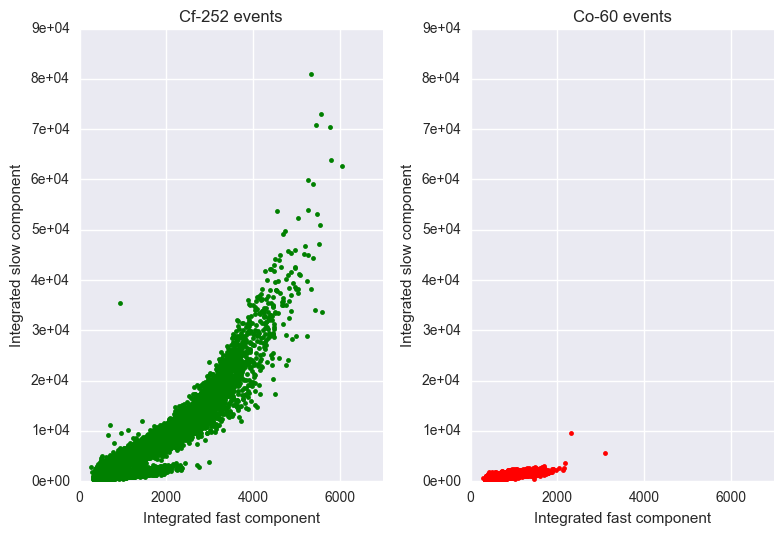

In [5]:
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
majorLocator = MultipleLocator(2000)
majorFormatter_x = FormatStrFormatter('%d')
majorFormatter_y = FormatStrFormatter('%.0e')

# calculate fast and slow components

# choose the range of summation of respective components 
buffer_tm=range(29,50)   # for baseline offset
S_width=range(59,66)     # fast component range 
T_width=range(66,tm0_Cf.shape[0])  # slow component range

# for Californium-252 
baseline_tm0=np.mean(tm0_Cf[buffer_tm,:],axis=0)
baseline_tm1=np.mean(tm1_Cf[buffer_tm,:],axis=0)
print 'Californium source check:'
print 'Avg and std of TM0 baseline: ', np.mean(baseline_tm0),np.std(baseline_tm0)
print 'Avg and std of TM1 baseline: ', np.mean(baseline_tm1),np.std(baseline_tm1)

tm0_fast_Cf=(np.maximum(0,npm.repmat(baseline_tm0,len(S_width),1)-tm0_Cf[S_width,:])).sum(axis=0)
tm0_slow_Cf=(np.maximum(0,npm.repmat(baseline_tm0,len(T_width),1)-tm0_Cf[T_width,:])).sum(axis=0)

tm1_fast_Cf=(np.maximum(0,npm.repmat(baseline_tm1,len(S_width),1)-tm1_Cf[S_width,:])).sum(axis=0)
tm1_slow_Cf=(np.maximum(0,npm.repmat(baseline_tm1,len(T_width),1)-tm1_Cf[T_width,:])).sum(axis=0)

tm_fast_Cf=tm0_fast_Cf+tm1_fast_Cf
tm_slow_Cf=tm0_slow_Cf+tm1_slow_Cf


# for Cobalt-60
baseline_tm0=np.mean(tm0_Co[buffer_tm,:],axis=0)
baseline_tm1=np.mean(tm1_Co[buffer_tm,:],axis=0)
print 'Cobalt source check:'
print 'Avg and std of TM0 baseline: ', np.mean(baseline_tm0),np.std(baseline_tm0)
print 'Avg and std of TM1 baseline: ', np.mean(baseline_tm1),np.std(baseline_tm1)

tm0_fast_Co=(np.maximum(0,npm.repmat(baseline_tm0,len(S_width),1)-tm0_Co[S_width,:])).sum(axis=0)
tm0_slow_Co=(np.maximum(0,npm.repmat(baseline_tm0,len(T_width),1)-tm0_Co[T_width,:])).sum(axis=0)

tm1_fast_Co=(np.maximum(0,npm.repmat(baseline_tm1,len(S_width),1)-tm1_Co[S_width,:])).sum(axis=0)
tm1_slow_Co=(np.maximum(0,npm.repmat(baseline_tm1,len(T_width),1)-tm1_Co[T_width,:])).sum(axis=0)

tm_fast_Co=tm0_fast_Co+tm1_fast_Co
tm_slow_Co=tm0_slow_Co+tm1_slow_Co

# Make scatter plots for Cf-252 and Co-60 sources
f, (ax1, ax2) = plt.subplots(1, 2)
f.set_figwidth(8)
ax1.plot(tm_fast_Cf,tm_slow_Cf,".",c='g', mec='g')
ax1.xaxis.set_major_locator(majorLocator)
ax1.xaxis.set_major_formatter(majorFormatter_x)
ax1.yaxis.set_major_formatter(majorFormatter_y)
ax1.set_title('Cf-252 events')
ax1.set_ylim([0, 9e4])
ax1.set_xlim([0, 7e3])
ax1.set_xlabel('Integrated fast component')
ax1.set_ylabel('Integrated slow component')
ax1.grid(True)

ax2.plot(tm_fast_Co,tm_slow_Co,".",c='r', mec='r')
ax2.set_title('Co-60 events')
ax2.set_ylim([0, 9e4])
ax2.set_xlim([0, 7e3])
ax2.set_xlabel('Integrated fast component')
ax2.set_ylabel('Integrated slow component')
ax2.xaxis.set_major_locator(majorLocator)
ax2.xaxis.set_major_formatter(majorFormatter_x)
ax2.yaxis.set_major_formatter(majorFormatter_y)
ax2.grid(True)

f.tight_layout() 
plt.show()

## Figure of Merit (FOM) 
FOM is a parameter to assess the PSD effectiveness. The higher the FOM, the better the separation of the neutron and gamma data is, in terms of the ratio of slow and fast component values. 

First, the ratio of the corresponding fast and slow component of each event is calculated:

$\text{ratio}=\frac{\text{slow component}}{\text{fast component}}$

The $\text{ratio}$ values have different distributions for neutron or gamma events. To calculate the FOM, the mean ($\mu$) and standard deviation ($\sigma$) of the distributions are calculated. They are then used in the following FOM formula:

$FOM = \frac{|(\mu_{gamma}-\mu_{neutron})|}{\sigma_{gamma}+\sigma_{neutron}}$


In [4]:
# Define function to calculate FOM
import matplotlib.pyplot as plt
import numpy as np

def calculate_FOM(data,particle_type,dataset_type):
    ratio=data[:,1]/data[:,0]
    neutron_ratio=ratio[particle_type==1]
    gamma_ratio=ratio[particle_type==0]
    
    [freq,bin_edges]=np.histogram(ratio[ratio<10],bins=100)
    plt.step(bin_edges[1:], freq, color='black',label='total events')
    [freq,bin_edges]=np.histogram(neutron_ratio[neutron_ratio<10],bin_edges)
    plt.bar(bin_edges[:-1], freq, width=bin_edges[1]-bin_edges[0], color='red', alpha=0.1,label='neutron events')
    [freq,bin_edges]=np.histogram(gamma_ratio[gamma_ratio<10],bin_edges)
    plt.bar(bin_edges[:-1], freq, width=bin_edges[1]-bin_edges[0], color='blue', alpha=0.1,label='gamma events')
    plt.legend()
    plt.xlabel('Ratio (Slow/Fast) values')
    plt.ylabel('Frequency')
    if dataset_type == 0:
        plt.title('Classification of neutron and gamma events (training dataset)')
    else:
         plt.title('Classification of neutron and gamma events (unknown dataset)')
            
    mean_neutron=np.mean(neutron_ratio[neutron_ratio<10])
    mean_gamma=np.mean(gamma_ratio[gamma_ratio<10])
    
    std_neutron=np.std(neutron_ratio[neutron_ratio<10])
    std_gamma=np.std(gamma_ratio[gamma_ratio<10])
    
    FOM=np.abs(mean_gamma-mean_neutron)/(std_neutron+std_gamma)
    
    return FOM

# Classification of neutron/gamma particles using KNeighborsClassifier

The task is to use Machine Learning tools to automatically label each event with its particle type (0=gamma, 1=neutron).

## Visualizing the training dataset 
Training dataset consists of neutrons and gamma events of Californium (lead shielded to remove gammas) and Cobalt sources (only gammas available,  with a few background neutrons)

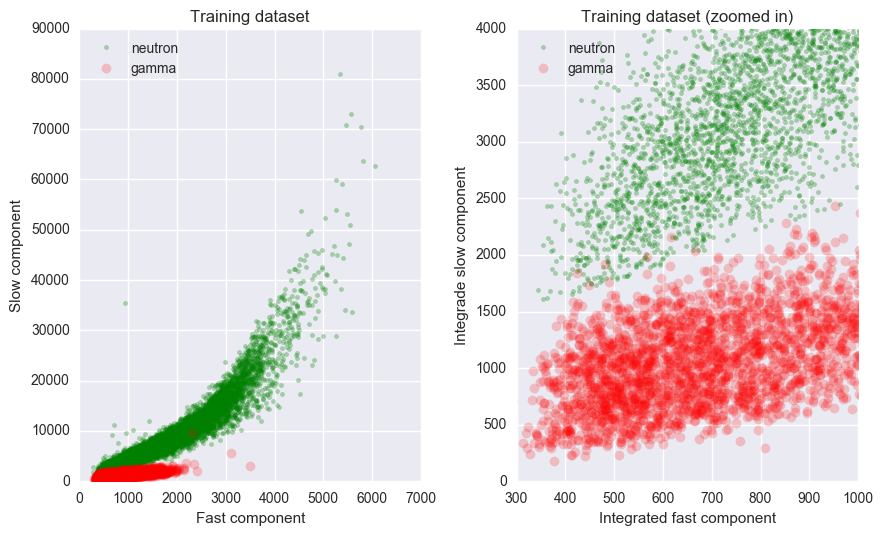

FOM of training dataset = 2.1547


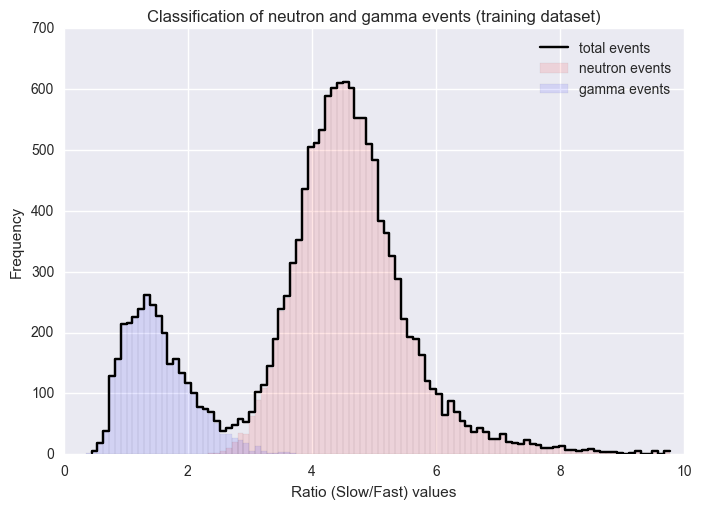

In [4]:
plt.rcParams['legend.numpoints'] = 1
train=np.loadtxt('training_dataset.txt')
train_events=train[:,:2]
train_type=train[:,2]

# Visual check the training dataset
f, (ax1, ax2) = plt.subplots(1, 2)
f.set_figwidth(9)

ax1.plot(train_events[train_type==1,0],train_events[train_type==1,1],".",c='g', mec='g',label='neutron',alpha=0.3)
ax1.plot(train_events[train_type==0,0],train_events[train_type==0,1],"o",c='r', mec='r',label='gamma',alpha=0.2)
ax1.legend(loc=2)
ax1.set_title('Training dataset')
ax1.set_xlabel('Fast component')
ax1.set_ylabel('Slow component')
ax1.set_ylim([0, 9e4])
ax1.set_xlim([0, 7e3])

ax2.plot(train_events[train_type==1,0],train_events[train_type==1,1],".",c='g', mec='g',label='neutron',alpha=0.3)
ax2.plot(train_events[train_type==0,0],train_events[train_type==0,1],"o",c='r', mec='r',label='gamma',alpha=0.2)
ax2.legend(loc=2)
ax2.set_title('Training dataset (zoomed in)')
ax2.set_xlabel('Integrated fast component')
ax2.set_ylabel('Integrade slow component')
ax2.set_ylim([0, 4e3])
ax2.set_xlim([3e2, 1e3])
f.tight_layout() 
plt.show()

# Distribution of Slow/Fast components
plt.figure()
train_FOM=calculate_FOM(train_events,train_type,0)
print 'FOM of training dataset = %.4f'%train_FOM
plt.show()

## Load in and visualize the unknown dataset

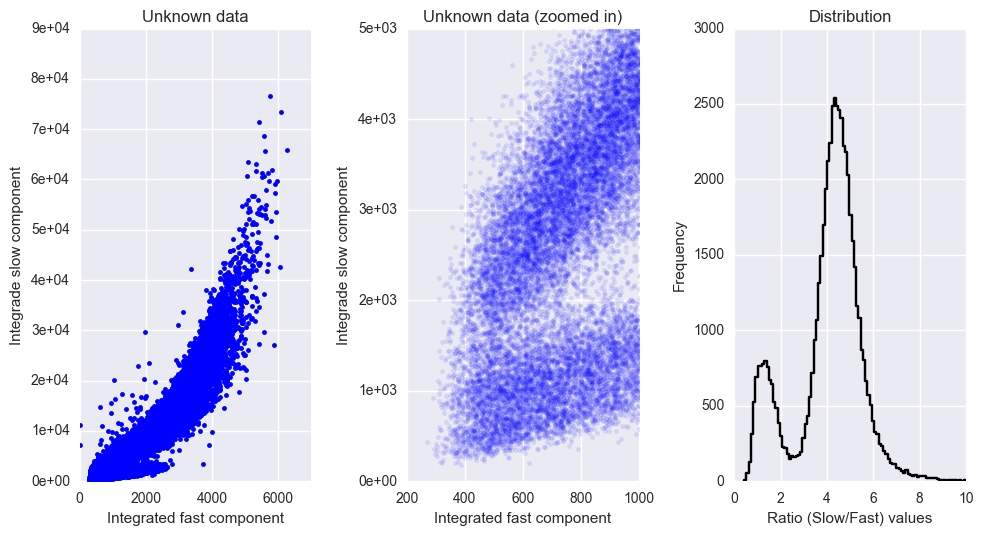

In [5]:
majorFormatter_x = FormatStrFormatter('%d')
majorFormatter_y = FormatStrFormatter('%.0e')

# Load unknown dataset
unknown_data=np.loadtxt('unknown_dataset.txt')
unknown_events=unknown_data[:,:2]

# Visual check the unknown dataset
plt.figure()
f, (ax1, ax2,ax3) = plt.subplots(1, 3)
f.set_figwidth(10)

ax1.plot(unknown_events[:,0],unknown_events[:,1],".",c='b', mec='b')
ax1.set_title('Unknown data')
ax1.xaxis.set_major_locator(MultipleLocator(2000))
ax1.xaxis.set_major_formatter(majorFormatter_x)
ax1.yaxis.set_major_formatter(majorFormatter_y)
ax1.set_ylim([0, 9e4])
ax1.set_xlim([0, 7e3])
ax1.set_xlabel('Integrated fast component')
ax1.set_ylabel('Integrade slow component')

ax2.plot(unknown_events[:,0],unknown_events[:,1],".",c='b', mec='b',alpha=0.1)
ax2.set_title('Unknown data (zoomed in)')
ax2.xaxis.set_major_locator(MultipleLocator(200))
ax2.xaxis.set_major_formatter(majorFormatter_x)
ax2.yaxis.set_major_formatter(majorFormatter_y)
ax2.set_ylim([0, 0.5e4])
ax2.set_xlim([2e2, 1e3])
ax2.set_xlabel('Integrated fast component')
ax2.set_ylabel('Integrade slow component')

ratio=unknown_data[:,1]/unknown_data[:,0]
[freq,bin_edges]=np.histogram(ratio[ratio<10],bins=100)
ax3.step(bin_edges[1:], freq, color='black',label='total events')
ax3.set_title('Distribution')
ax3.set_xlabel('Ratio (Slow/Fast) values')
plt.ylabel('Frequency')


f.tight_layout() 

plt.show()

## Train and obtain the KNeighborsClassifier

In [6]:
majorLocator = MultipleLocator(2000)
majorFormatter_x = FormatStrFormatter('%d')
majorFormatter_y = FormatStrFormatter('%.2e')

# Train with KNeighbor Classifier

from sklearn.neighbors import KNeighborsClassifier

compare_score=0
for n_neighbors in [3,15]:
        for algorithms in ['auto', 'ball_tree', 'kd_tree', 'brute']:
            for weights in ['uniform', 'distance']:
                clf1 = KNeighborsClassifier(n_neighbors, weights=weights,algorithm=algorithms)
                clf1.fit(train_events, train_type)
                train_score=clf1.score(train_events, train_type)
                if train_score>compare_score:
                    clf_best=clf1
                    compare_score=train_score
                print 'Fitted (n_neighbors=', n_neighbors,'/ algorithms=',algorithms,'/ weights=',weights, ') Score for KNeighborsClassifier=%.4f'%train_score
  

Fitted (n_neighbors= 3 / algorithms= auto / weights= uniform ) Score for KNeighborsClassifier=0.9992
Fitted (n_neighbors= 3 / algorithms= auto / weights= distance ) Score for KNeighborsClassifier=1.0000
Fitted (n_neighbors= 3 / algorithms= ball_tree / weights= uniform ) Score for KNeighborsClassifier=0.9992
Fitted (n_neighbors= 3 / algorithms= ball_tree / weights= distance ) Score for KNeighborsClassifier=1.0000
Fitted (n_neighbors= 3 / algorithms= kd_tree / weights= uniform ) Score for KNeighborsClassifier=0.9992
Fitted (n_neighbors= 3 / algorithms= kd_tree / weights= distance ) Score for KNeighborsClassifier=1.0000
Fitted (n_neighbors= 3 / algorithms= brute / weights= uniform ) Score for KNeighborsClassifier=0.9992
Fitted (n_neighbors= 3 / algorithms= brute / weights= distance ) Score for KNeighborsClassifier=1.0000
Fitted (n_neighbors= 15 / algorithms= auto / weights= uniform ) Score for KNeighborsClassifier=0.9990
Fitted (n_neighbors= 15 / algorithms= auto / weights= distance ) Sco

## Use the best classifier to predict unknown dataset

FOM of predicted dataset by KNeighbor =  2.10413473503 vs training dataset FOM ( 2.15466034328 )


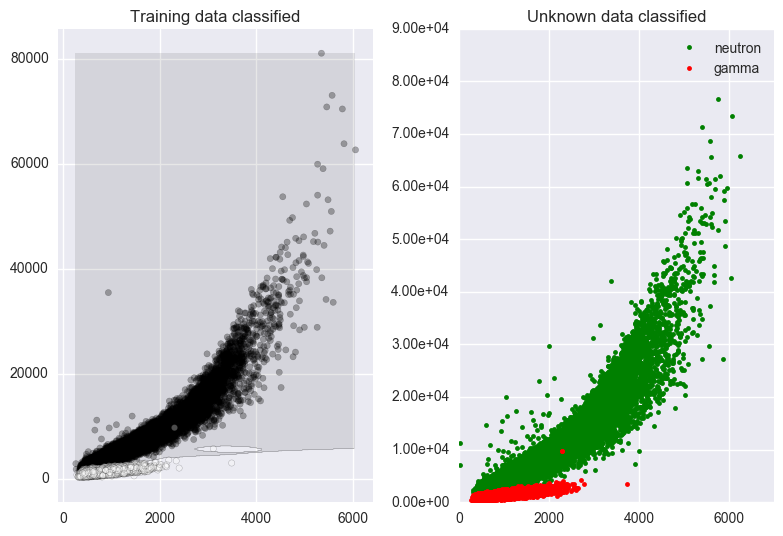

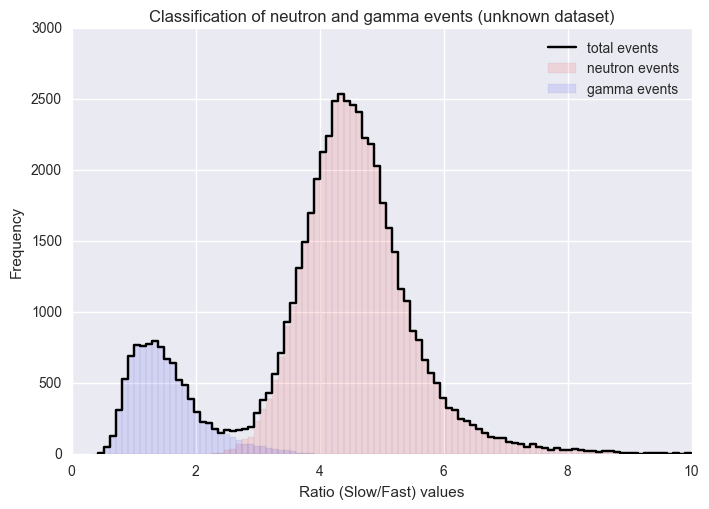

In [7]:
from matplotlib.colors import ListedColormap

# Plotting decision regions
h = 50  # step size in the mesh
x_min, x_max = train_events[:, 0].min() - 1, train_events[:, 0].max() + 1
y_min, y_max = train_events[:, 1].min() - 1, train_events[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

Z1 = clf_best.predict(np.c_[xx.ravel(), yy.ravel()])
Z1 = Z1.reshape(xx.shape)

predict_type=clf_best.predict(unknown_events)

f, (ax1, ax2) = plt.subplots(1, 2)
ax1.contourf(xx, yy, Z1, alpha=0.1)
ax1.scatter(train_events[:, 0], train_events[:, 1], c=train_type, alpha=0.3)

ax1.set_title('Training data classified')
ax1.xaxis.set_major_locator(plt.MultipleLocator(2000))

ax2.plot(unknown_events[predict_type==1,0],unknown_events[predict_type==1,1],".",c='g', mec='g',label='neutron')
ax2.plot(unknown_events[predict_type==0,0],unknown_events[predict_type==0,1],".",c='r', mec='r',label='gamma')
ax2.set_title('Unknown data classified')
ax2.xaxis.set_major_locator(plt.MultipleLocator(2000))
ax2.xaxis.set_major_formatter(majorFormatter_x)
ax2.yaxis.set_major_formatter(majorFormatter_y)
ax2.legend()
ax2.set_ylim([0, 9e4])
ax2.set_xlim([0, 7e3])

f.tight_layout() 

plt.figure()
predicted_FOM=calculate_FOM(unknown_events,predict_type,1)
print 'FOM of predicted dataset by KNeighbor = ',predicted_FOM, 'vs training dataset FOM (', train_FOM, ')'
plt.show()

# Classification of neutron/gamma particles using SVM

The task is to use Support Vector Machine method to determine a hyperplane which separates events with particle type (0=gamma, 1=neutron).

In [8]:
from sklearn import svm
import numpy as np
from matplotlib import pyplot as plt

# load in training dataset
train=np.loadtxt('training_dataset.txt')
train_events=train[:,:2]
train_type=train[:,2]
ratio=train_events[:,1]/train_events[:,0]

# Load in unknown dataset
unknown_data=np.loadtxt('unknown_dataset.txt')
unknown_events=unknown_data[:,:2]

In [9]:
# Caution: It takes a long time to run the following codes
# Create a grid of gamma and C parameters to obtain best SVM score value

from sklearn.grid_search import GridSearchCV
# param_grid = {"C": [1,10,100], "gamma": [0.1, 0.01, 0.001]}
# gridsearch = GridSearchCV(svm.SVC(), param_grid)

# gridsearch.fit(train_events, train_type)
# print gridsearch.best_params_

## Best parameters that result in highest SVM score

# C=gridsearch.best_params_.values()[0]
# gamma=gridsearch.best_params_.values()[1]

SVM training set score =  1.0
FOM of training dataset = 2.1547


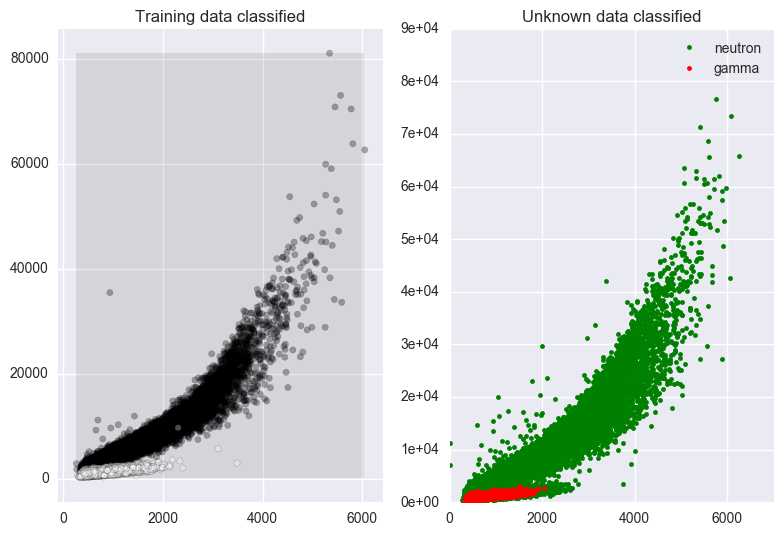

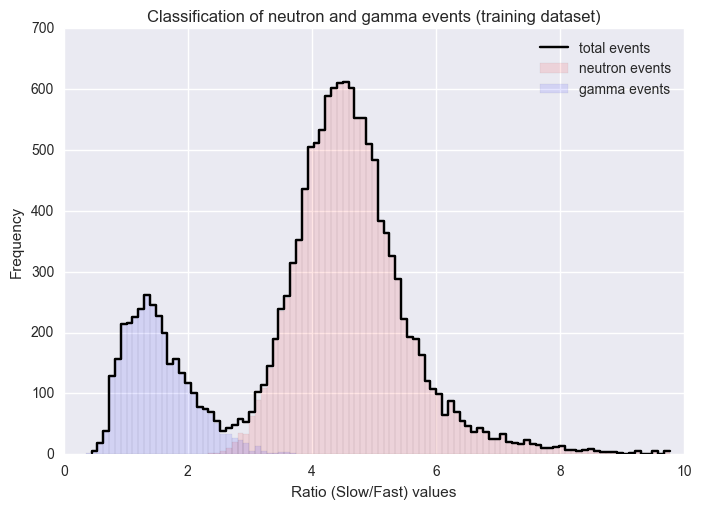

FOM of predicted dataset by SVM =  1.55123699926 vs training dataset FOM ( 2.15466034328 )


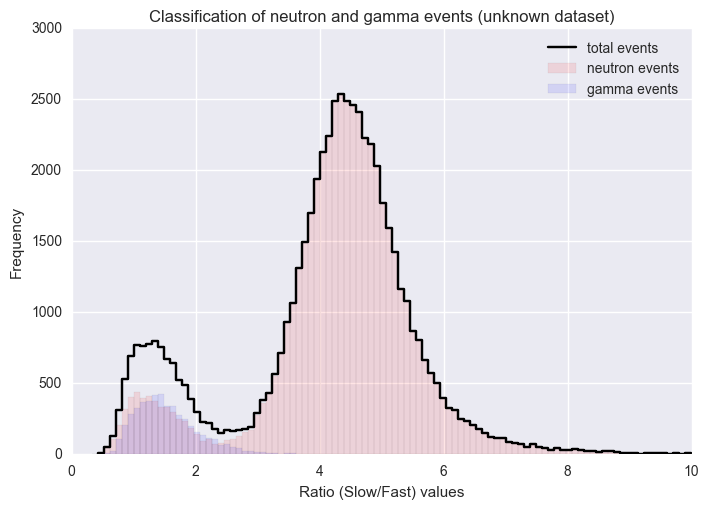

In [10]:
import seaborn as sns
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
majorFormatter_x = FormatStrFormatter('%d')
majorFormatter_y = FormatStrFormatter('%.0e')

C=10
gamma=0.001

clf_svm = svm.SVC(gamma=0.01, C=100)
clf_svm.fit(train_events, train_type) 
print 'SVM training set score = ', clf_svm.score(train_events,train_type)

# create classified map
h=50
x_min, x_max = train_events[:, 0].min() - 1, train_events[:, 0].max() + 1
y_min, y_max = train_events[:, 1].min() - 1, train_events[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z2 = clf_svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z2 = Z2.reshape(xx.shape)

predict_type_svm=clf_svm.predict(unknown_events)

f, (ax1, ax2) = plt.subplots(1, 2)
ax1.contourf(xx, yy, Z2, alpha=0.1)
ax1.scatter(train_events[:, 0], train_events[:, 1], c=train_type, alpha=0.3)

ax1.set_title('Training data classified')
ax1.xaxis.set_major_locator(plt.MultipleLocator(2000))

ax2.plot(unknown_events[predict_type_svm==1,0],unknown_events[predict_type_svm==1,1],".",c='g', mec='g',label='neutron')
ax2.plot(unknown_events[predict_type_svm==0,0],unknown_events[predict_type_svm==0,1],".",c='r', mec='r',label='gamma')
ax2.set_title('Unknown data classified')
ax2.xaxis.set_major_locator(plt.MultipleLocator(2000))
ax2.xaxis.set_major_formatter(majorFormatter_x)
ax2.yaxis.set_major_formatter(majorFormatter_y)
ax2.legend()
ax2.set_ylim([0, 9e4])
ax2.set_xlim([0, 7e3])

f.tight_layout() 


# Calculate (again) the FOM of training dataset
plt.figure()
train_FOM=calculate_FOM(train_events,train_type,0)
print 'FOM of training dataset = %.4f'%train_FOM
plt.show()

plt.figure()
predicted_FOM=calculate_FOM(unknown_events,predict_type_svm,1)
print 'FOM of predicted dataset by SVM = ',predicted_FOM, 'vs training dataset FOM (', train_FOM, ')'
plt.show()

# Conclusion

Pulse shape discrimination (PSD) of neutron and gamma (ie. photons) events as detected by Helium-4 gas scintillation detector was investigated with Machine Learning (ML) tools. The Figure of Merit (FOM) value was used to assess the effectively of the PSD + ML methods. A training dataset which contains known neutron and gamma events has an FOM value of 2.1547. The methods of K-Nearest Neighbors (KNN) and Support Vector Machine (SVM) were applied to the training dataset. Various fitting parameters were investigated and chosen to achieve the highest fitting score (ie. accuracy) for both KNN and SVM on training dataset to be 1. When applied to the unknown dataset to differentiate neutron and gammas, the FOM values of the classified events for the KNN and SVM are found to be 2.104 and 1.55 respectively. In comparison to the FOM of the training dataset (2.1547), the KNN method performs much better than the SVM method based on the FOM values. 